In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from math import factorial

# Finite Differences Weights.

### a) Implementation
Implement the function `FDweights` that, given a derivative order `k`, a point `x0`, and a set of stencil points `x`, returns the finite difference weights. Use the monomial test function approach.

In [6]:
def FDweights(
    k: int,
    x0: float,
    x: list[float]
):
    """ Finite Difference Weights using monomials

    param k: derivative order
    param x0: point where derivative is approximated
    param x: stencil points
    return: weights
    """
    x = np.array(x)
    N = len(x)

    # we have to define the matrix A
    A = np.zeros((N, N))
    for idx in range(N):
        A[idx, :] = (x-x0)**idx

    # we have to define the vector b
    # its only value different from zero is the k+1 position
    b = np.zeros(N)
    b[k] = factorial(k)

    # solve the linear system
    c = la.solve(A, b)
    return c

In [7]:
# we have to define the parameters
x0 = 0
h = 1
x = [(x0+n*h) for n in range(-3, 4)]
print(x)

[-3, -2, -1, 0, 1, 2, 3]


In [8]:
W = FDweights(4, x0, x)
print('Weights:', W)

Weights: [-0.16666667  2.         -6.5         9.33333333 -6.5         2.
 -0.16666667]


In [ ]:
### for lab1
print(FDweights(1, 0, [0, 1, 2, 3, 4, 5]))  # centered 2nd order

[-2.08333333  4.         -3.          1.33333333 -0.25      ]


### b) Convergence test
Use your function in a convergence experiment:

* Choose a smooth test function, e.g. $u(x) = \sin(x)$ with derivative $u'(x) = \cos(x)$.
* For different step sizes $h$, compute the finite difference approximation of $u'(x_0)$.
* Measure the error and plot it in log-log scale.
* Compare the observed convergence rates with the expected slopes.

/Users/jenriquezafra/Máster/Python/venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.11022e-16): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenriquezafra/Máster/Python/venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.77556e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenriquezafra/Máster/Python/venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=6.93889e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenriquezafra/Máster/Python/venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.73472e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


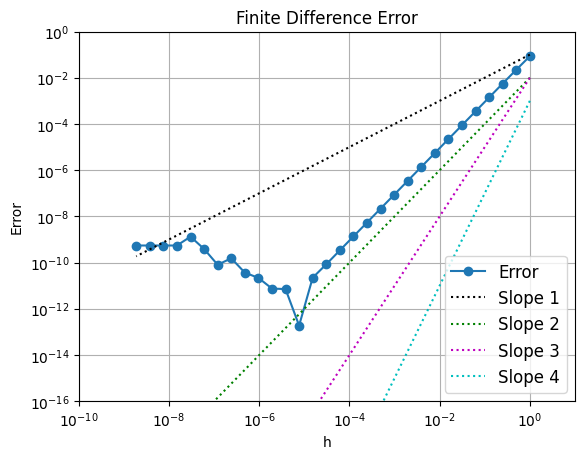

In [5]:
def convergence(x0, ns, hvec, u, du, k):
    res = []
    for h in hvec:
        stencil = np.arange(-(ns - 1) // 2, (ns - 1) // 2 + 1)
        x = x0 + stencil * h
        c = FDweights(k, x0, x)
        dun = np.dot(c, u(x))
        res.append(abs(du(x0) - dun))
    return res

# Example test function
u = lambda x: np.sin(x)
du = lambda x: np.cos(x)

x0 = 1
hvec = 1.0 / 2**np.arange(30)
ns = 3

res = convergence(x0, ns, hvec, u, du, 1)

# Plot results
plt.loglog(hvec, res, 'o-', label="Error")
plt.loglog(hvec, 0.1*hvec**1, 'k:', label="Slope 1")
plt.loglog(hvec, 0.01*hvec**2, 'g:', label="Slope 2")
plt.loglog(hvec, 0.01*hvec**3, 'm:', label="Slope 3")
plt.loglog(hvec, 0.001*hvec**4, 'c:', label="Slope 4")
plt.xlabel("h")
plt.ylabel("Error")
plt.title("Finite Difference Error")
plt.legend(fontsize=12, loc="lower right")
plt.grid(True, which="both")
plt.xlim(1e-10, 10)
plt.ylim(1e-16, 1)
plt.show()

The slope gives us the order of convergence. We can see that our data is almost paralel to the slope 2, which has $m=2$ in this scale. Therefore, we can conclude that our algorithm has convergence order of 2 ($\mathcal O(h^2))$.

### c) Validation against tabulated formulas
You must **check that your computed weights match the expected convergence rates** up to 4th order derivative and 4th degree of accuracy.

In [6]:
# for 4th degree we will use a stencil of 5 points
x0 = 0
h = 1
xp = [(x0+n*h) for n in range(-3, 4)]
W4 = FDweights(4, x0, xp)
print(W4)

[-0.16666667  2.         -6.5         9.33333333 -6.5         2.
 -0.16666667]


This is exactly what Wikipedia shows, so we can conclude our algorithm works fine.